In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# kernel_info_df_new=pd.read_pickle("non_alc_curves.csv.pkl")
kernel_info_df_new=pd.read_pickle("over_combo_rural.csv.pkl")
ridge=pd.read_pickle("Coefficients_ridge.pkl")

In [52]:
#from rocket doc
# ROCKET [1]_ generates random convolutional kernels, including random length and
#     dilation. It transforms the time series with two features per kernel. The first
#     feature is global max pooling and the second is proportion of positive values.

ridge["feature_type"]=np.where(ridge.index% 2 ==0, "PPV", "MAX")

In [64]:
ridge

,coeff,Kernel,Importance,feature_type
feature,,,,
1,-0.000026,1.0,0.007797,MAX
2,0.000353,1.0,0.104828,PPV
3,-0.000004,2.0,0.001235,MAX
4,0.002226,2.0,0.661217,PPV
5,-0.000030,3.0,0.009029,MAX
...,...,...,...,...
19996,-0.000031,9998.0,0.009327,PPV
19997,-0.000026,9999.0,0.007739,MAX
19998,0.000085,9999.0,0.025107,PPV


In [54]:
## Include only max??
ridge.sort_values(by='Importance', ascending=False).head(100)

,coeff,Kernel,Importance,feature_type
feature,,,,
4056,0.003366,2028.0,1.000000,PPV
8438,-0.003289,4219.0,0.977016,PPV
17348,-0.003281,8674.0,0.974550,PPV
5480,0.003260,2740.0,0.968303,PPV
1882,-0.003235,941.0,0.960875,PPV
...,...,...,...,...
5704,-0.001955,2852.0,0.580633,PPV
10718,-0.001952,5359.0,0.579808,PPV
5548,-0.001951,2774.0,0.579529,PPV


<AxesSubplot:>

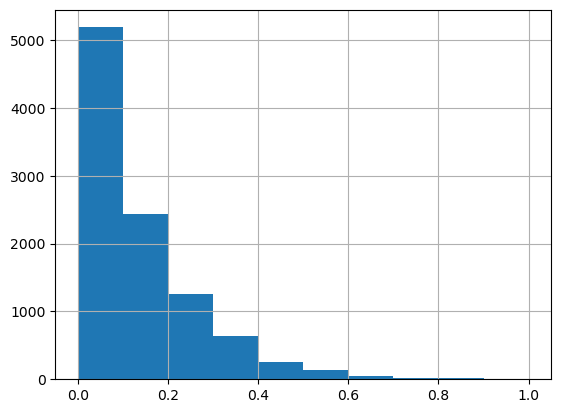

In [63]:
ridge[ridge["feature_type"]=="PPV"]["Importance"].hist()

<AxesSubplot:>

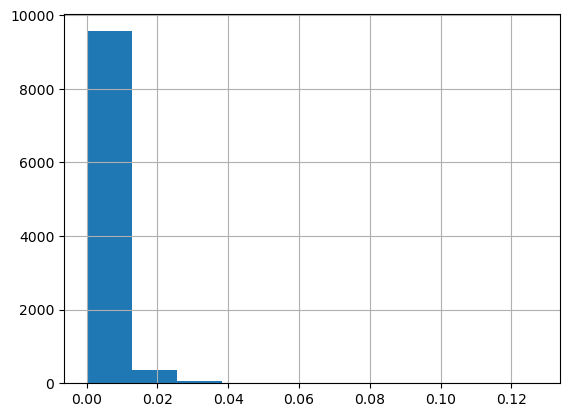

In [60]:
ridge[ridge["feature_type"]=="MAX"]["Importance"].hist()

In [23]:
kernel_info_df_new

,Kernel,Weights,Length,Bias,Dilation,Padding,Num_Channel_Indices,Channel_Indices,Max_Importance
0,1,"[0.4909144341945648, 1.6128098964691162, -0.62...",11,0.318762,4,0,2,"[3, 0]",0.166507
1,2,"[-1.3686285018920898, 0.2831191420555115, 0.77...",7,-0.100210,49,0,1,[2],0.153960
2,3,"[-0.6306646466255188, 1.1531929969787598, 1.19...",7,-0.618608,15,0,4,"[3, 5, 1, 4]",0.051350
3,4,"[1.726679801940918, 0.9167304635047913, 0.1412...",9,0.650339,35,140,4,"[3, 4, 1, 5]",0.013333
4,5,"[0.2634615898132324, -0.021953856572508812, -0...",11,0.135473,4,0,6,"[1, 4, 5, 3, 0, 2]",0.158154
...,...,...,...,...,...,...,...,...,...
9995,9996,"[-1.028579592704773, 0.806110143661499, 0.2406...",7,0.142732,31,93,1,[4],0.022104
9996,9997,"[-0.5843325257301331, 1.7993717193603516, -1.1...",9,0.970109,46,0,2,"[0, 1]",0.147675
9997,9998,"[-0.9042667150497437, -0.49525773525238037, 0....",9,-0.134627,14,0,6,"[4, 1, 3, 5, 2, 0]",0.149715
9998,9999,"[0.23059800267219543, 0.8388417363166809, -0.3...",11,0.321349,2,10,2,"[2, 3]",0.015382


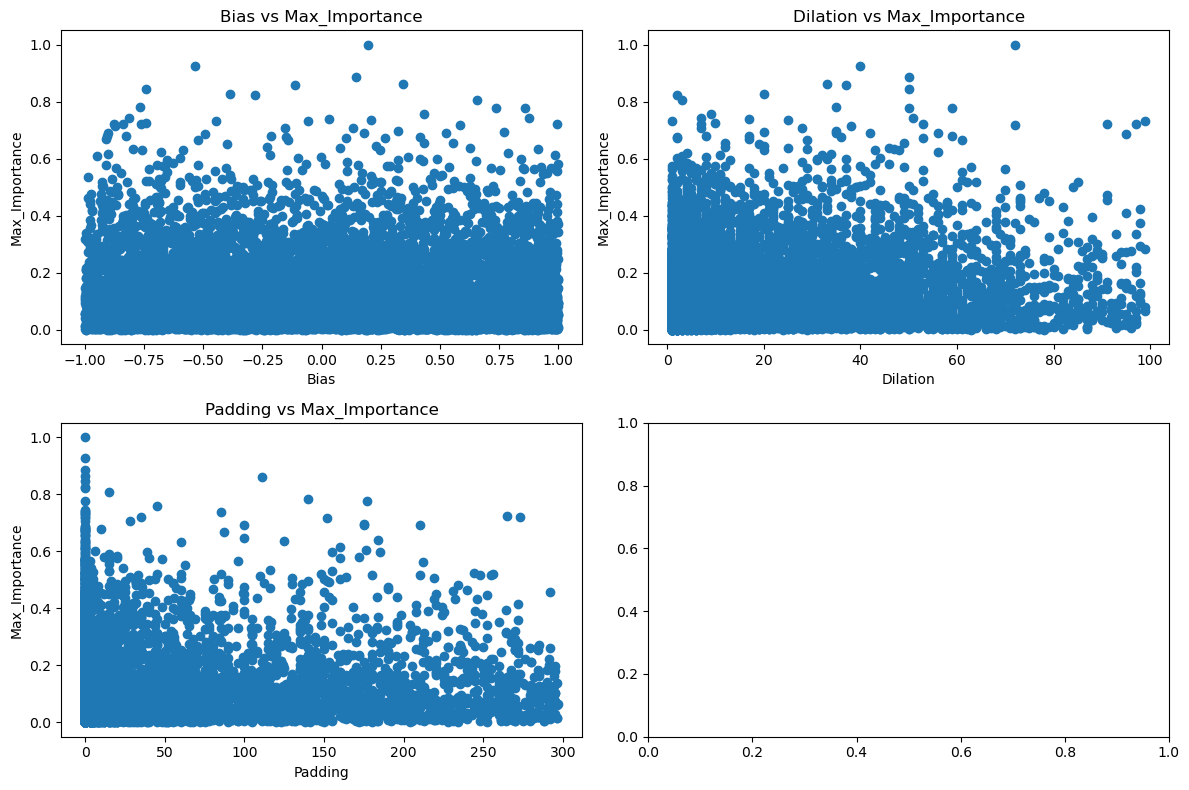

In [24]:
import matplotlib.pyplot as plt

# Create a figure and a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through the subplots and create the scatter plots
for i, col in enumerate(['Bias', 'Dilation', 'Padding']):
    ax = axes.flat[i]  # Get the corresponding subplot axis
    ax.scatter(kernel_info_df_new[col], kernel_info_df_new['Max_Importance'])
    ax.set_xlabel(col)
    ax.set_ylabel('Max_Importance')
    ax.set_title(f'{col} vs Max_Importance')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
def pattern_to_string(pattern):
    return ','.join(map(str, pattern))

kernel_info_df_new['Pattern_String_channel'] = kernel_info_df_new['Channel_Indices'].apply(pattern_to_string)

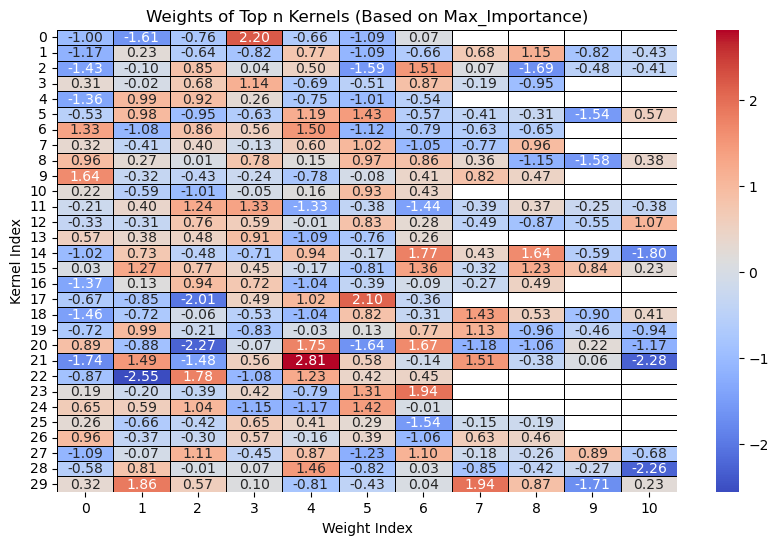

In [26]:
import seaborn as sns
top_10_kernels = kernel_info_df_new.sort_values(by='Max_Importance', ascending=False).head(30)

top_10_kernels_weights = top_10_kernels['Weights']

max_length = top_10_kernels_weights.apply(len).max()

# truncate to same size
padded_weights = top_10_kernels_weights.apply(lambda x: np.pad(x, (0, max_length - len(x)), mode='constant', constant_values=np.nan))
padded_weights_array = np.array(padded_weights.tolist())

plt.figure(figsize=(10, 6))
sns.heatmap(padded_weights_array, cmap='coolwarm', linewidths=0.5, linecolor='black', annot=True, fmt=".2f")
plt.xlabel('Weight Index')
plt.ylabel('Kernel Index')
plt.title('Weights of Top n Kernels (Based on Max_Importance)')
plt.show()


In [20]:
pattern_groups_data.nlargest(5, 'Mean_Max_Importance')

,Mean_Max_Importance,Frequency
Pattern_String_channel,,
"5,0,2,1,4,3",1.000000,2
"0,2,3",0.841658,9
"2,0,1,3,5",0.806076,4
"0,2,4,3,5",0.740463,3
"4,2,1,3,0",0.713979,1


In [61]:

top_patterns_n=20


pattern_groups_data = kernel_info_df_new.groupby("Pattern_String_channel").agg({'Max_Importance': 'max', 'Pattern_String_channel': 'count'})
pattern_groups_data.columns = ['Mean_Max_Importance', 'Frequency']
top_n_patterns = pattern_groups_data[pattern_groups_data["Frequency"] > 0].nlargest(top_patterns_n, 'Mean_Max_Importance')


rows = (top_patterns_n + 4) // 5  
cols = min(5, top_patterns_n)  


fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(30 * cols, 20 * rows))  # Adjust figure size as needed

# Keep track of subplot indices
i = 0


for pattern, score in zip(top_n_patterns.index, top_n_patterns['Mean_Max_Importance']):
  
    top_n_kernels_pattern = kernel_info_df_new[kernel_info_df_new["Pattern_String_channel"] == pattern].nlargest(10, 'Max_Importance')
    if not top_n_kernels_pattern.empty:
        
        top_10_kernels_weights = top_n_kernels_pattern['Weights']
        max_length = top_10_kernels_weights.apply(len).max()
        padded_weights = top_10_kernels_weights.apply(lambda x: np.pad(x, (0, max_length - len(x)), mode='constant', constant_values=np.nan))
        padded_weights_array = np.array(padded_weights.tolist())

        sns.heatmap(padded_weights_array, cmap='coolwarm', linewidths=0.5, linecolor='black', annot=True, fmt=".2f", ax=axes.flat[i])
        axes.flat[i].set_xlabel('Weight Index')
        axes.flat[i].set_ylabel('Kernel Index')
        axes.flat[i].set_title(f'Top n Kernels for Pattern: {pattern} (Score: {score:.4f})')

        i += 1 
    else:
        print(f"No kernels found for pattern: {pattern} (Score: {score:.4f})")


9491    37
Name: Dilation, dtype: int32